You will receive a csv file called “personal data.csv” from us. 
The file contains information of persons:
- Column 1: the person's national register number
- Column 2: the surname of the person
- Column 3: the first name of the person

A national number has the following format: 
- 3 times 2 digits separated by a dot; this is the date of birth of the person in the form yy.mm.dd (first two digits are the 2 last digits of the year of birth, then a dot, then two digits corresponding to the month of birth, then a dot and then two more digits corresponding to the day of birth)
- A dash “-”
- Three digits: this is serial number to distinguish persons born on the same day; women get an even serial number, men an odd serial number
- One dot
- Two digits that act as a control number; how this control is done is not important for this statement
A woman born on July 28, 1994 might have the following national registry number: 
94.07.28-124.89.
We wish to create an application to create an overview of the number of births per day of the week. In this overview, the days of the week are represented by their English names, i.e., from “Monday” to “Sunday.”
In the following, add the necessary pieces of code.

Read the file “personal_data.csv” into a panda Dataframe named “data”

In [62]:
import pandas as pd

filepath = "personal_data.csv"
data = pd.read_csv(filepath, sep=';')

Check that this is done correctly by showing some of the first rows.

In [63]:
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,96.99.11-133.71,Janssens,Jef
2,02.122.12-122.32,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,93.07.25-1248.89,Lemmens,Elke


Change the national register numbers that do not meet the correct format (for now, consider only good format : 2 digits.2 digits.2 digits-3 digits.2 digits) by None.
Display the first rows again to verify that this was successful.

In [64]:
import numpy as np

# Define the correct format as a regular expression
correct_format = r'^\d{2}\.\d{2}\.\d{2}-\d{3}\.\d{2}$'

# Replace numbers that don't match the correct format with None
data.loc[~data['rijksregisternummer'].str.match(correct_format), 'rijksregisternummer'] = np.nan

# Display the first few rows
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,96.99.11-133.71,Janssens,Jef
2,NaN,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,NaN,Lemmens,Elke


Change the registry numbers whose first 8 characters do not match a date by None.
Display the first rows again to verify that this was successful.

In [65]:
import re
import numpy as np

# Define the date format as a regular expression
date_format = re.compile(r'^\d{2}\.(0[1-9]|1[0-2])\.(0[1-9]|[12][0-9]|3[01])')

# Define a function that checks if the first 8 characters of a value match the date format
def check_date_format(value):
    if date_format.match(str(value)[:8]):
        return value
    else:
        return np.nan

# Apply the function to the 'rijksregisternummer' column
data['rijksregisternummer'] = data['rijksregisternummer'].apply(check_date_format)

# Display the first few rows
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,NaN,Janssens,Jef
2,NaN,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,NaN,Lemmens,Elke


Delete the rows in the data frame in which the value None appears in one of the columns.
Display the first rows again to verify that this was successful.

In [66]:
# Delete rows where None appears in any column
data = data.dropna()

# Display the first few rows
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
3,99.07.01-005.56,Hendriks,Hendrik
5,00.10.11-133.71,Janssens,Jef
7,89.07.01-005.56,Hendriks,Hendrik
8,99.07.25-124.89,Lemmens,Elke


Modify the dataframe by adding a column named “date of birth” representing the date of birth as a datetime object.
Display the first rows again to verify that this was successful.

In [68]:
from datetime import datetime

# Extract the first 8 characters from 'rijksregisternummer' and convert them to a datetime object
data['date_of_birth'] = pd.to_datetime(data['rijksregisternummer'].str[:8], format='%y.%m.%d')

# Display the first few rows
data.head()


,rijksregisternummer,naam,voornaam,date_of_birth
0,94.07.25-124.89,Lemmens,Elke,1994-07-25
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01
5,00.10.11-133.71,Janssens,Jef,2000-10-11
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01
8,99.07.25-124.89,Lemmens,Elke,1999-07-25


Modify the data frame by adding a column named “day” that represents the day in the week that the person was born; the days are the English names for the days.
Display the first rows again to verify that this was successful.

In [70]:
# Add a 'day' column that represents the day of the week that the person was born
data['day'] = data['date_of_birth'].dt.day_name()

# Display the first few rows
data.head()

,rijksregisternummer,naam,voornaam,date_of_birth,day
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,Monday
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,Thursday
5,00.10.11-133.71,Janssens,Jef,2000-10-11,Wednesday
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,Saturday
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,Sunday


Run the following piece of code.

In [71]:
data["day"] = pd.Categorical(data["day"],["Monday","Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])
data.head()

,rijksregisternummer,naam,voornaam,date_of_birth,day
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,Monday
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,Thursday
5,00.10.11-133.71,Janssens,Jef,2000-10-11,Wednesday
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,Saturday
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,Sunday


Show a visual overview in the form of a histogram of the number of births by day of the week. 

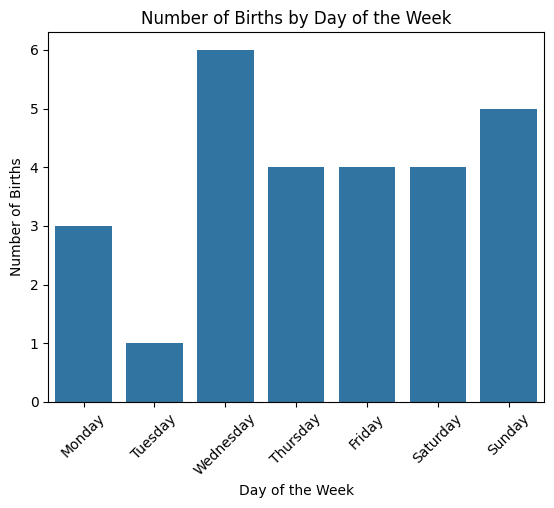

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of births by day of the week
births_by_day = data['day'].value_counts()

# Create a bar plot using seaborn
sns.barplot(x=births_by_day.index, y=births_by_day.values, order=["Monday","Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])

# Set the title and labels
plt.title('Number of Births by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Births')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()
